<a href="https://colab.research.google.com/github/pornnakanok/bsc_dpdm22/blob/main/New_%5Bdataprep1%5D_property_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# วิธีจากเว็บ
https://towardsdatascience.com/read-data-from-google-sheets-into-pandas-without-the-google-sheets-api-5c468536550

In [ ]:
import pandas as pd

# บ้าน

In [ ]:
sheet_id = '1CyazeXlzDEjqa7KlFkcTOR_kOhxa9GhRHXE-7dgNtHQ'
sheet_name = 'home'
url1 = f"https://docs.google.com/spreadsheets/d/1CyazeXlzDEjqa7KlFkcTOR_kOhxa9GhRHXE-7dgNtHQ/gviz/tq?tqx=out:csv&sheet=home"

In [ ]:
home = pd.read_csv(url1)
home.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
home = home[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
home.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                    True
dtype: bool

In [ ]:
home = home.dropna(subset=['ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])
home.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

## ประเมิน 1

In [ ]:
est1 = home[home['ID ผู้ประเมิน']==1]
est1.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
6,1,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
8,1,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [ ]:
est1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,609.0,6.090000e+02,6.090000e+02
mean,1.0,3.384346e+06,3.240345e+06
std,0.0,5.004719e+06,4.692873e+06
min,1.0,2.600000e+05,2.200000e+05
25%,1.0,1.490000e+06,1.500000e+06
50%,1.0,2.550000e+06,2.500000e+06
75%,1.0,4.000000e+06,4.000000e+06
max,1.0,1.039350e+08,1.000000e+08


## ประเมิน 2

In [ ]:
est2 = home[home['ID ผู้ประเมิน']==2]
est2.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,9000000.0,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [ ]:
est2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,498.0,4.980000e+02,4.980000e+02
mean,2.0,3.236534e+06,3.449197e+06
std,0.0,2.736420e+06,4.381048e+06
min,2.0,2.600000e+05,2.500000e+05
25%,2.0,1.683500e+06,1.892500e+06
50%,2.0,2.620000e+06,2.600000e+06
75%,2.0,4.070000e+06,4.200000e+06
max,2.0,2.390000e+07,8.000000e+07


### ความมั่นใจ

In [ ]:
est1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    609
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [ ]:
est2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    498
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

### ให้คะแนนทรัพย์

In [ ]:
est1['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     476
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    125
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        6
1 ขายไม่ได้แน่นอน                       2
Name: ให้คะแนนทรัพย์, dtype: int64

In [ ]:
est2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     366
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      117
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     14
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน       1
Name: ให้คะแนนทรัพย์, dtype: int64

# ที่ดิน

In [ ]:
sheet_id = '1CyazeXlzDEjqa7KlFkcTOR_kOhxa9GhRHXE-7dgNtHQ'
sheet_name = 'land'
url2 = f"https://docs.google.com/spreadsheets/d/1CyazeXlzDEjqa7KlFkcTOR_kOhxa9GhRHXE-7dgNtHQ/gviz/tq?tqx=out:csv&sheet=land"

In [ ]:
land = pd.read_csv(url2)
land.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,1800000.0,"8,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2200000.0,10000-22000,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,8000000.0,"25,000-80,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
land = land[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
land.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                    True
dtype: bool

In [ ]:
land = land.dropna(subset=['ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])
land.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

## ประเมิน 1

In [ ]:
land1 = land[land['ID ผู้ประเมิน']==1]
land1.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,1800000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
3,1,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,8000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
6,1,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,18000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


## ประเมิน 2

In [ ]:
land2 = land[land['ID ผู้ประเมิน']==2]
land2.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,70000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


### ความมั่นใจ

In [ ]:
land1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [ ]:
land2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

### ให้คะแนนทรัพย์

In [ ]:
land1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    55
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     45
Name: ให้คะแนนทรัพย์, dtype: int64

In [ ]:
land2['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    52
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     45
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       3
Name: ให้คะแนนทรัพย์, dtype: int64

# condo

In [ ]:
sheet_id = '1CyazeXlzDEjqa7KlFkcTOR_kOhxa9GhRHXE-7dgNtHQ'
sheet_name = 'condo'
url3 = f"https://docs.google.com/spreadsheets/d/1CyazeXlzDEjqa7KlFkcTOR_kOhxa9GhRHXE-7dgNtHQ/gviz/tq?tqx=out:csv&sheet=condo"

condo = pd.read_csv(url3)
condo.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,32,คอนโด,มั่นใจ,3500000,3500000,"60,000-130,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,36,คอนโด,มั่นใจ,1930000,2200000,"50,000-90,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,603,คอนโด,มั่นใจ,2438000,2800000,"35,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
condo = condo[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
condo.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

In [ ]:
condo1 = condo[condo['ID ผู้ประเมิน']==1]
condo1.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,32,คอนโด,มั่นใจ,3500000,3500000,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
1,1,36,คอนโด,มั่นใจ,1930000,2200000,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1,603,คอนโด,มั่นใจ,2438000,2800000,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน


# townhome

In [ ]:
sheet_id = '1CyazeXlzDEjqa7KlFkcTOR_kOhxa9GhRHXE-7dgNtHQ'
sheet_name = 'townhome'
url4 = f"https://docs.google.com/spreadsheets/d/1CyazeXlzDEjqa7KlFkcTOR_kOhxa9GhRHXE-7dgNtHQ/gviz/tq?tqx=out:csv&sheet=townhome"

townhome = pd.read_csv(url4)
townhome.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,700000,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,1500000,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,700000,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
townhome = townhome[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
townhome.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

## ประเมิน 1

In [ ]:
th1 = townhome[townhome['ID ผู้ประเมิน']==1]
th1.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,700000,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,700000,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,2520000,3500000,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน


## ประเมิน 2

In [ ]:
th2 = townhome[townhome['ID ผู้ประเมิน']==2]
th2.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,1500000,1 ขายไม่ได้แน่นอน
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,1500000,1 ขายไม่ได้แน่นอน
5,2,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,2520000,4000000,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


### ความมั่นใจ

In [ ]:
th1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    120
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [ ]:
th2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    120
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

### ให้คะแนนทรัพย์

In [ ]:
th1['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     100
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     14
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        6
Name: ให้คะแนนทรัพย์, dtype: int64

In [ ]:
th2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     103
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี      7
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        7
1 ขายไม่ได้แน่นอน                       2
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน       1
Name: ให้คะแนนทรัพย์, dtype: int64

# building

In [ ]:
sheet_id = '1CyazeXlzDEjqa7KlFkcTOR_kOhxa9GhRHXE-7dgNtHQ'
sheet_name = 'building'
url5 = f"https://docs.google.com/spreadsheets/d/1CyazeXlzDEjqa7KlFkcTOR_kOhxa9GhRHXE-7dgNtHQ/gviz/tq?tqx=out:csv&sheet=building"

building = pd.read_csv(url5)
building.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,6000000.0,"8,000-30,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000.0,"8,000-40,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
building = building[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
building.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                    True
dtype: bool

In [ ]:
building = building.dropna(subset=['ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])
building.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

## ประเมิน 1

In [ ]:
building1 = building[building['ID ผู้ประเมิน']==1]
building1.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,6000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
4,1,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000,13500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


## ประเมิน 2

In [ ]:
building2 = building[building['ID ผู้ประเมิน']==2]
building2.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,8000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000,20000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


### ความมั่นใจ

In [ ]:
building1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    99
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [ ]:
building2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    90
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

### ให้คะแนนทรัพย์

In [ ]:
building1['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     51
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    45
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
1 ขายไม่ได้แน่นอน                      1
Name: ให้คะแนนทรัพย์, dtype: int64

In [ ]:
building2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     73
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      11
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     6
Name: ให้คะแนนทรัพย์, dtype: int64

# HW1 เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนของราคาตั้งขาย ใช้ MAPE เป็นเกณฑ์ในการเปรียบเทียบ

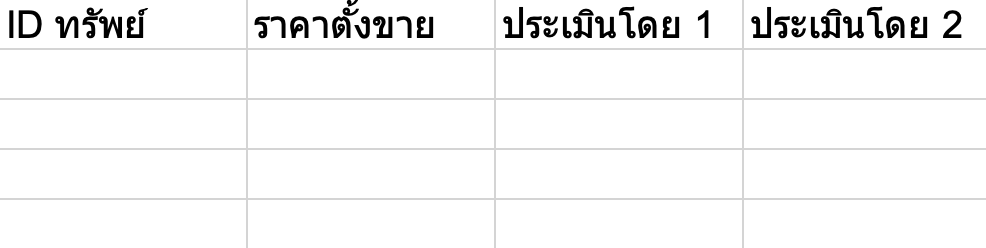

# MAPE บ้าน

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [ ]:
est1MAPE = MAPE(est1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(est1['ราคาทรัพย์']))
est2MAPE = MAPE(est2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(est2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {est1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {est2MAPE*100:.2f}%')
est2['ประเมินโดย1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
est2_d = est2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดย1','ราคาทรัพย์'])
one2two = MAPE(est2_d['ประเมินราคาซื้อ-ขาย'],est2_d['ประเมินโดย1'])
two2one = MAPE(est2_d['ประเมินโดย1'],est2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(est2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 14.50%
นักประเมิน คนที่ 2 = 11.14%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 14.56%
จำนวนทรัพย์ทั้งหมด 498 ทรัพย์


<ipython-input-74-5628d63770c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2['ประเมินโดย1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


In [ ]:
a = est2[['post id','ราคาทรัพย์','ประเมินโดย1','ประเมินราคาซื้อ-ขาย']]
a.rename(columns={'ประเมินโดย1': 'ประเมินโดย 1'}, inplace=True)
a.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย 2'}, inplace=True)
a.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0


# MAPE ที่ดิน

In [ ]:
land1MAPE = MAPE(land1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(land1['ราคาทรัพย์']))
land2MAPE = MAPE(land2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(land2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {land1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {land2MAPE*100:.2f}%')
land2['ประเมินโดย1'] = land2['post id'].map(land1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
land2_d = land2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดย1','ราคาทรัพย์'])
one2two = MAPE(land2_d['ประเมินราคาซื้อ-ขาย'],land2_d['ประเมินโดย1'])
two2one = MAPE(land2_d['ประเมินโดย1'],land2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(land2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 79.74%
นักประเมิน คนที่ 2 = 43.70%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 58.41%
จำนวนทรัพย์ทั้งหมด 100 ทรัพย์


<ipython-input-47-94ed1068ae04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land2['ประเมินโดย1'] = land2['post id'].map(land1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


In [ ]:
b = land2[['post id','ราคาทรัพย์','ประเมินโดย1','ประเมินราคาซื้อ-ขาย']]
b.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย2'}, inplace=True)
b.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0


# MAPE ทาวน์โฮม

In [ ]:
th1MAPE = MAPE(th1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(th1['ราคาทรัพย์']))
th2MAPE = MAPE(th2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(th2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nทาวน์โฮม\nนักประเมิน คนที่ 1 = {th1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {th2MAPE*100:.2f}%')
th2['ประเมินโดย1'] = th2['post id'].map(th1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
th2_d = th2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดย1','ราคาทรัพย์'])
one2two = MAPE(th2_d['ประเมินราคาซื้อ-ขาย'],th2_d['ประเมินโดย1'])
two2one = MAPE(th2_d['ประเมินโดย1'],th2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(th2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ทาวน์โฮม
นักประเมิน คนที่ 1 = 15.26%
นักประเมิน คนที่ 2 = 12.20%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 10.92%
จำนวนทรัพย์ทั้งหมด 120 ทรัพย์


<ipython-input-49-8f5246eb725c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  th2['ประเมินโดย1'] = th2['post id'].map(th1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


In [ ]:
c = th2[['post id','ราคาทรัพย์','ประเมินโดย1','ประเมินราคาซื้อ-ขาย']]
c.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย2'}, inplace=True)
c.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2
1,https://nayoo.co/khonkaen/posts/548,1045000,700000,1500000
3,https://nayoo.co/khonkaen/posts/549,935000,700000,1500000
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000,4000000
7,https://nayoo.co/khonkaen/posts/580,3850000,3500000,3200000
9,https://nayoo.co/khonkaen/posts/582,544000,1000000,800000


# MAPE อาคารพาณิชย์

In [ ]:
building1MAPE = MAPE(building1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(building1['ราคาทรัพย์']))
building2MAPE = MAPE(building2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(building2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nอาคารพาณิชย์\nนักประเมิน คนที่ 1 = {building1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {building2MAPE*100:.2f}%')
building2['ประเมินโดย1'] = building2['post id'].map(building1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
building2_d = building2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดย1','ราคาทรัพย์'])
one2two = MAPE(building2_d['ประเมินราคาซื้อ-ขาย'],building2_d['ประเมินโดย1'])
two2one = MAPE(building2_d['ประเมินโดย1'],building2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(building2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
อาคารพาณิชย์
นักประเมิน คนที่ 1 = 20.28%
นักประเมิน คนที่ 2 = 9.43%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 12.64%
จำนวนทรัพย์ทั้งหมด 90 ทรัพย์


<ipython-input-51-90ee023c4033>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  building2['ประเมินโดย1'] = building2['post id'].map(building1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


In [ ]:
d = building2[['post id','ราคาทรัพย์','ประเมินโดย1','ประเมินราคาซื้อ-ขาย']]
d.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย2'}, inplace=True)
d.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2
1,https://nayoo.co/khonkaen/posts/6,6600000,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,11400000,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000,4000000.0,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0


## เขียน function ตรวจสอบค่าที่เติม 0 ผิด

In [ ]:
max(10,2)

10

In [ ]:
def check_v(in1,in2):
    return max(in1/in2,in2/in1)

In [ ]:
check_v(100,1200)

12.0

# สร้าง column ใหม่ ลงในตาราง home โดย ค่าใน column คือค่า จาก function check(ราคาตั้งขาย,ราคาประเมิน1)

## บ้าน

In [ ]:
a['check1']=a.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 1']),axis=1)
a['check2']=a.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 2']),axis=1)
a

<ipython-input-80-cb4dfbe5fb35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['check1']=a.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 1']),axis=1)
<ipython-input-80-cb4dfbe5fb35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['check2']=a.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 2']),axis=1)


,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check1,check2
1,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0,1.156000,1.070370
3,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0,1.181818,1.083333
5,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0,1.210000,1.487603
7,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0,1.257143,1.189189
9,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0,1.100000,1.100000
...,...,...,...,...,...,...
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0,2.115385,1.153846
1212,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0,1.147541,1.220000
1214,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0,1.694915,1.016949
1216,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0,1.025000,1.230000


## ที่ดิน

In [ ]:
b['check1']=b.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย1']),axis=1)
b['check2']=b.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย2']),axis=1)
b

<ipython-input-57-d7e01e7d07cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['check1']=b.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย1']),axis=1)
<ipython-input-57-d7e01e7d07cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['check2']=b.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย2']),axis=1)


,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2,check1,check2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0,1.555556,1.400000
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0,1.862500,1.241667
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,5.000000,1.285714
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0,1.857143,1.083333
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0,1.363636,1.200000
...,...,...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0,1.250000,1.250000
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,1.500000,1.000000
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0,1.325000,1.060000
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0,1.153846,1.153846


## townhome

In [ ]:
c['check1']=c.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย1']),axis=1)
c['check2']=c.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย2']),axis=1)
c

<ipython-input-58-ed237fecefc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['check1']=c.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย1']),axis=1)
<ipython-input-58-ed237fecefc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['check2']=c.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย2']),axis=1)


,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2,check1,check2
1,https://nayoo.co/khonkaen/posts/548,1045000,700000,1500000,1.492857,1.435407
3,https://nayoo.co/khonkaen/posts/549,935000,700000,1500000,1.335714,1.604278
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000,4000000,1.388889,1.587302
7,https://nayoo.co/khonkaen/posts/580,3850000,3500000,3200000,1.100000,1.203125
9,https://nayoo.co/khonkaen/posts/582,544000,1000000,800000,1.838235,1.470588
...,...,...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1105000,1000000,1200000,1.105000,1.085973
236,https://nayoo.co/khonkaen/posts/18551,1440000,1500000,1700000,1.041667,1.180556
237,https://nayoo.co/khonkaen/posts/19434,2000000,1600000,1900000,1.250000,1.052632
238,https://nayoo.co/khonkaen/posts/19501,1790000,1600000,1700000,1.118750,1.052941


## อาคารพาณิชย์

In [ ]:
d['check1']=d.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย1']),axis=1)
d['check2']=d.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย2']),axis=1)
d

<ipython-input-59-8675a4e17f88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['check1']=d.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย1']),axis=1)
<ipython-input-59-8675a4e17f88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['check2']=d.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย2']),axis=1)


,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2,check1,check2
1,https://nayoo.co/khonkaen/posts/6,6600000,6000000.0,8000000.0,1.100000,1.212121
3,https://nayoo.co/khonkaen/posts/17,11400000,12000000.0,12000000.0,1.052632,1.052632
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0,1.666667,1.125000
7,https://nayoo.co/khonkaen/posts/22,3500000,4000000.0,4000000.0,1.142857,1.142857
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0,1.772727,1.300000
...,...,...,...,...,...,...
183,https://nayoo.co/khonkaen/posts/6168,2652000,3000000.0,2700000.0,1.131222,1.018100
185,https://nayoo.co/khonkaen/posts/6169,3851000,3800000.0,4000000.0,1.013421,1.038691
187,https://nayoo.co/khonkaen/posts/6176,3410000,3200000.0,3500000.0,1.065625,1.026393
191,https://nayoo.co/khonkaen/posts/7137,3900000,3600000.0,4000000.0,1.083333,1.025641


# HW2 แก้ไข ข้อมูลแล้วคำนวณ MAPE ใหม่อีกรอบมาเทียบกัน

In [71]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [79]:
import pandas as pd

## บ้าน

In [104]:
sheet_id = '18KP6JtZmwWcTZfG0vAZYVQ1vtcdsHBrZuazJ_AZnhgg'
sheet_name = 'home'
url_1 = f"https://docs.google.com/spreadsheets/d/18KP6JtZmwWcTZfG0vAZYVQ1vtcdsHBrZuazJ_AZnhgg/gviz/tq?tqx=out:csv&sheet=home"

In [105]:
home_new = pd.read_csv(url_1)
home_new.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
home_new = home_new[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
home_new.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                    True
dtype: bool

### MAPE บ้าน

In [107]:
est_1 = home_new[home_new['ID ผู้ประเมิน']==1]
est_1 = est_1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
est_2 = home_new[home_new['ID ผู้ประเมิน']==2]
est_2 = est_2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
est_1MAPE = MAPE(est_1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(est_1['ราคาทรัพย์']))
est_2MAPE = MAPE(est_2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(est_2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {est_1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {est_2MAPE*100:.2f}%')
est_2['ประเมิน2'] = est_2['post id'].map(est_1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = est_2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2two = MAPE(id2_d['ประเมินราคาซื้อ-ขาย'],id2_d['ประเมิน2'])
two2one = MAPE(id2_d['ประเมิน2'],id2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 12.97%
นักประเมิน คนที่ 2 = 9.00%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 13.58%
จำนวนทรัพย์ทั้งหมด 497 ทรัพย์


In [108]:
est_1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    608
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [109]:
est_2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    497
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [110]:
aa = id2_d[['ID ผู้ประเมิน','post id','ราคาทรัพย์','ประเมิน2','ประเมินราคาซื้อ-ขาย']]
aa.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมิน1'}, inplace=True)
aa.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ID ผู้ประเมิน,post id,ราคาทรัพย์,ประเมิน2,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0
3,2,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0
5,2,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0
7,2,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0
9,2,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0


## ที่ดิน

In [111]:
sheet_id = '18KP6JtZmwWcTZfG0vAZYVQ1vtcdsHBrZuazJ_AZnhgg'
sheet_name = 'land'
url_2 = f"https://docs.google.com/spreadsheets/d/18KP6JtZmwWcTZfG0vAZYVQ1vtcdsHBrZuazJ_AZnhgg/gviz/tq?tqx=out:csv&sheet=land"

In [112]:
land_new = pd.read_csv(url_2)
land_new.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,1800000.0,"8,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2200000.0,10000-22000,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
land_new = land_new[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
land_new.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                    True
dtype: bool

### MAPE ที่ดิน

In [114]:
land_1 = land_new[land_new['ID ผู้ประเมิน']==1]
land_1 = land_1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
land_2 = land_new[land_new['ID ผู้ประเมิน']==2]
land_2 = land_2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
land_1MAPE = MAPE(land_1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(land_1['ราคาทรัพย์']))
land_2MAPE = MAPE(land_2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(land_2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {land_1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {land_2MAPE*100:.2f}%')
land_2['ประเมิน2'] = land_2['post id'].map(land_1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
land2_d = land_2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2two = MAPE(land2_d['ประเมินราคาซื้อ-ขาย'],land2_d['ประเมิน2'])
two2one = MAPE(land2_d['ประเมิน2'],land2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(land2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 45.13%
นักประเมิน คนที่ 2 = 19.89%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 32.23%
จำนวนทรัพย์ทั้งหมด 98 ทรัพย์


In [115]:
land2_d.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมิน2
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1800000.0
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,8000000.0
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,70000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,18000000.0
10,2,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000,60000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,35000000.0
13,2,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0


In [116]:
land_b = land2_d[['ID ผู้ประเมิน','post id','ราคาทรัพย์','ประเมิน2','ประเมินราคาซื้อ-ขาย']]
land_b.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมิน1'}, inplace=True)
land_b.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ID ผู้ประเมิน,post id,ราคาทรัพย์,ประเมิน2,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,2,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,2,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,2,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,2,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0


## ทาวน์โฮม

In [117]:
sheet_id = '18KP6JtZmwWcTZfG0vAZYVQ1vtcdsHBrZuazJ_AZnhgg'
sheet_name = 'townhome'
url_3 = f"https://docs.google.com/spreadsheets/d/18KP6JtZmwWcTZfG0vAZYVQ1vtcdsHBrZuazJ_AZnhgg/gviz/tq?tqx=out:csv&sheet=townhome"

In [118]:
th_new = pd.read_csv(url_3)
th_new.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,700000,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,1500000,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,700000,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
th_new = th_new[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
th_new.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

### MAPE ทาวน์โฮม

In [120]:
th_1 = th_new[th_new['ID ผู้ประเมิน']==1]
th_1 = th_1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
th_2 = th_new[th_new['ID ผู้ประเมิน']==2]
th_2 = th_2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
th_1MAPE = MAPE(th_1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(th_1['ราคาทรัพย์']))
th_2MAPE = MAPE(th_2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(th_2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nทาวน์โฮม\nนักประเมิน คนที่ 1 = {th_1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {th_2MAPE*100:.2f}%')
th_2['ประเมิน2'] = th_2['post id'].map(th_1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
th2_d = th_2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2two = MAPE(th2_d['ประเมินราคาซื้อ-ขาย'],th2_d['ประเมิน2'])
two2one = MAPE(th2_d['ประเมิน2'],th2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(th2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ทาวน์โฮม
นักประเมิน คนที่ 1 = 15.26%
นักประเมิน คนที่ 2 = 12.20%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 10.92%
จำนวนทรัพย์ทั้งหมด 120 ทรัพย์


In [121]:
th_d = th2_d[['ID ผู้ประเมิน','post id','ราคาทรัพย์','ประเมิน2','ประเมินราคาซื้อ-ขาย']]
th_d.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมิน1'}, inplace=True)
th_d.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ID ผู้ประเมิน,post id,ราคาทรัพย์,ประเมิน2,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/548,1045000,700000,1500000
3,2,https://nayoo.co/khonkaen/posts/549,935000,700000,1500000
5,2,https://nayoo.co/khonkaen/posts/579,2520000,3500000,4000000
7,2,https://nayoo.co/khonkaen/posts/580,3850000,3500000,3200000
9,2,https://nayoo.co/khonkaen/posts/582,544000,1000000,800000


## อาคารพาณิชย์

In [122]:
sheet_id = '18KP6JtZmwWcTZfG0vAZYVQ1vtcdsHBrZuazJ_AZnhgg'
sheet_name = 'building'
url_4 = f"https://docs.google.com/spreadsheets/d/18KP6JtZmwWcTZfG0vAZYVQ1vtcdsHBrZuazJ_AZnhgg/gviz/tq?tqx=out:csv&sheet=building"

In [123]:
building_new = pd.read_csv(url_4)
building_new.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,6000000,"8,000-30,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,8000000,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000,"8,000-40,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
building_new = building_new[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
building_new.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

### MAPE อาคารพาณิชย์

In [125]:
building_1 = building_new[building_new['ID ผู้ประเมิน']==1]
building_1 = building_1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
building_2 = building_new[building_new['ID ผู้ประเมิน']==2]
building_2 = building_2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
building_1MAPE = MAPE(building_1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(building_1['ราคาทรัพย์']))
building_2MAPE = MAPE(building_2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(building_2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nอาคารพาณิชย์\nนักประเมิน คนที่ 1 = {building_1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {building_2MAPE*100:.2f}%')
building_2['ประเมิน2'] = building_2['post id'].map(building_1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
building2_d = building_2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2two = MAPE(building2_d['ประเมินราคาซื้อ-ขาย'],building2_d['ประเมิน2'])
two2one = MAPE(building2_d['ประเมิน2'],building2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(building2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
อาคารพาณิชย์
นักประเมิน คนที่ 1 = 11.70%
นักประเมิน คนที่ 2 = 9.49%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 12.53%
จำนวนทรัพย์ทั้งหมด 91 ทรัพย์


In [126]:
b_d = building2_d[['ID ผู้ประเมิน','post id','ราคาทรัพย์','ประเมิน2','ประเมินราคาซื้อ-ขาย']]
b_d.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมิน1'}, inplace=True)
b_d.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ID ผู้ประเมิน,post id,ราคาทรัพย์,ประเมิน2,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/6,6600000,6000000,8000000
3,2,https://nayoo.co/khonkaen/posts/17,11400000,12000000,12000000
5,2,https://nayoo.co/khonkaen/posts/21,22500000,13500000,20000000
7,2,https://nayoo.co/khonkaen/posts/22,3500000,4000000,4000000
9,2,https://nayoo.co/khonkaen/posts/24,3900000,2200000,3000000


# HW3 visualize แสดงความสัมพันธ์ ราคา(ตั้งขายและประเมิน)-ความมั่นใจ-ให้คะแนนทรัพย์

## บ้าน

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl

In [ ]:
home_new[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
home_new.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                    True
dtype: bool

In [ ]:
home_new = home_new.dropna(subset=['ให้คะแนนทรัพย์','ประเมินราคาซื้อ-ขาย'])
home_new.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

In [ ]:
home_new1 = home_new[home_new['ความมั่นใจในการเมินราคาทรัพย์']=='มั่นใจ']
home_new1.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [ ]:
home_new2 = home_new1.groupby(['ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์'])[['ความมั่นใจในการเมินราคาทรัพย์']].count()
home_new2

,,ความมั่นใจในการเมินราคาทรัพย์
ID ผู้ประเมิน,ความมั่นใจในการเมินราคาทรัพย์,
1,มั่นใจ,608
2,มั่นใจ,497


### เปรียบเทียบความมั่นใจจากนักประเมินคนที่ 1 และคนที่ 2 ของบ้าน

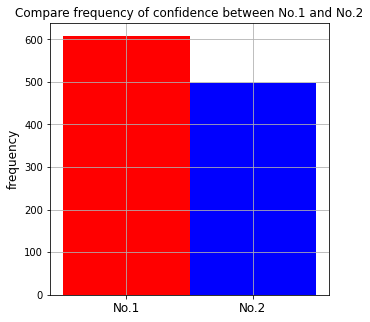

In [ ]:
mpl.rcParams['figure.figsize']=[5,5]

plt.bar([1,1.5],home_new2['ความมั่นใจในการเมินราคาทรัพย์'], color=['red','blue'],width=0.5) 
plt.xticks([1,1.5],['No.1','No.2'],fontsize=12)
plt.title('Compare frequency of confidence between No.1 and No.2',fontsize=12)
plt.grid(True)
plt.ylabel('frequency',fontsize=12);

### เปรียบเทียบคะแนนทรัพย์จากนักประเมินคนที่ 1 และคนที่ 2 ของบ้าน

In [ ]:
n = est_2.replace(['1 ขายไม่ได้แน่นอน','2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี','3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน','4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน','5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน'], ['1','2','3','4','5'])
n = n.replace(['มั่นใจ'], ['confidence'])
n.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมิน2
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,confidence,2890000,2700000.0,4,2500000.0
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,confidence,2600000,2400000.0,3,2200000.0
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,confidence,6050000,9000000.0,5,5000000.0
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,confidence,4400000,3700000.0,3,3500000.0
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,confidence,2750000,2500000.0,3,2500000.0


In [ ]:
m = est_1.replace(['1 ขายไม่ได้แน่นอน','2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี','3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน','4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน','5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน'], ['1','2','3','4','5'])
m = m.replace(['มั่นใจ'], ['confidence'])
m.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,confidence,2890000,2500000.0,3
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,confidence,2600000,2200000.0,2
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,confidence,6050000,5000000.0,3
6,1,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,confidence,4400000,3500000.0,2
8,1,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,confidence,2750000,2500000.0,3


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


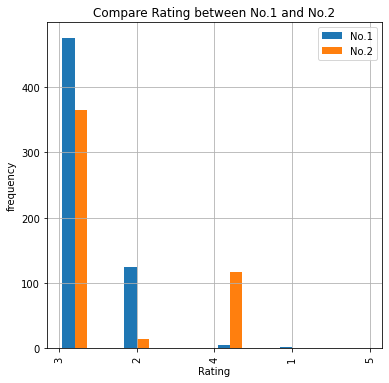

In [ ]:
mpl.rcParams['figure.figsize']=[6,6]

a1 = np.array(m['ให้คะแนนทรัพย์'])
b1 = np.array(n['ให้คะแนนทรัพย์'])

plt.hist([a1,b1],label=['No.1','No.2'])
plt.legend(loc='upper right')
plt.title("Compare Rating between No.1 and No.2")
plt.xlabel("Rating")
plt.ylabel("frequency")
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

## ที่ดิน

In [ ]:
land_new.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,1800000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,4,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2200000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,1,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,8000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [ ]:
land_new[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
home_new.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

In [ ]:
land_new1 = land_new[(land_new['ID ผู้ประเมิน']== 1) | (land_new['ID ผู้ประเมิน']==2)]
land_new1.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,1800000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,1,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,8000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
6,1,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,18000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [ ]:
land_new1 = land_new1.groupby(['ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์'])[['ความมั่นใจในการเมินราคาทรัพย์']].count()
land_new1

,,ความมั่นใจในการเมินราคาทรัพย์
ID ผู้ประเมิน,ความมั่นใจในการเมินราคาทรัพย์,
1,มั่นใจ,98
2,มั่นใจ,98


### เปรียบเทียบความมั่นใจจากนักประเมินคนที่ 1 และคนที่ 2 ของที่ดิน

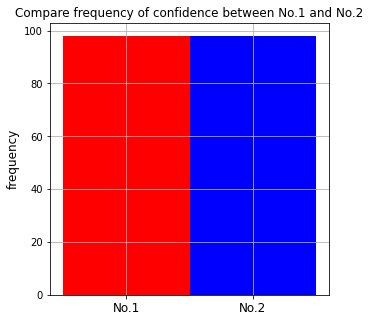

In [ ]:
mpl.rcParams['figure.figsize']=[5,5]

plt.bar([1,1.5],land_new1['ความมั่นใจในการเมินราคาทรัพย์'], color=['red','blue'],width=0.5) 
plt.xticks([1,1.5],['No.1','No.2'],fontsize=12)
plt.title('Compare frequency of confidence between No.1 and No.2',fontsize=12)
plt.grid(True)
plt.ylabel('frequency',fontsize=12);

### เปรียบเทียบคะแนนทรัพย์จากนักประเมินคนที่ 1 และคนที่ 2 ของที่ดิน

In [ ]:
o = land_1.replace(['1 ขายไม่ได้แน่นอน','2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี','3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน','4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน','5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน'], ['1','2','3','4','5'])
o = o.replace(['มั่นใจ'], ['confidence'])
o.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,confidence,2800000,1800000.0,3
3,1,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,confidence,14900000,8000000.0,2
6,1,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,confidence,90000000,18000000.0,2
9,1,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,confidence,65000000,35000000.0,2
12,1,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,confidence,3000000,2200000.0,3


In [ ]:
p = land_2.replace(['1 ขายไม่ได้แน่นอน','2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี','3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน','4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน','5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน'], ['1','2','3','4','5'])
p = p.replace(['มั่นใจ'], ['confidence'])
p.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมิน2
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,confidence,2800000,2000000.0,2,1800000.0
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,confidence,14900000,12000000.0,2,8000000.0
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,confidence,90000000,70000000.0,2,18000000.0
10,2,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,confidence,65000000,60000000.0,2,35000000.0
13,2,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,confidence,3000000,2500000.0,3,2200000.0


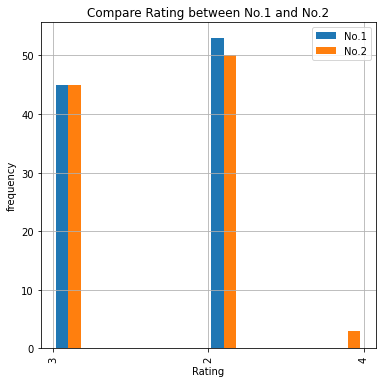

In [ ]:
mpl.rcParams['figure.figsize']=[6,6]

a4 = np.array(o['ให้คะแนนทรัพย์'])
b4 = np.array(p['ให้คะแนนทรัพย์'])

plt.hist([a4,b4],label=['No.1','No.2'])
plt.legend(loc='upper right')
plt.title("Compare Rating between No.1 and No.2")
plt.xlabel("Rating")
plt.ylabel("frequency")
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

## ทาวน์โฮม

In [ ]:
th_new.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,700000,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,1500000,1 ขายไม่ได้แน่นอน
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,700000,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,1500000,1 ขายไม่ได้แน่นอน
4,1,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,2520000,3500000,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน


In [ ]:
th_new1 = th_new.groupby(['ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์'])[['ความมั่นใจในการเมินราคาทรัพย์']].count()
th_new1

,,ความมั่นใจในการเมินราคาทรัพย์
ID ผู้ประเมิน,ความมั่นใจในการเมินราคาทรัพย์,
1,มั่นใจ,120
2,มั่นใจ,120


### เปรียบเทียบความมั่นใจจากนักประเมินคนที่ 1 และคนที่ 2 ของทาวน์โฮม

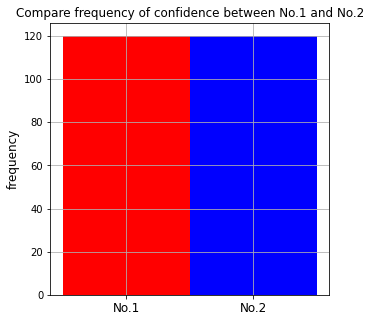

In [ ]:
mpl.rcParams['figure.figsize']=[5,5]

plt.bar([1,1.5],th_new1['ความมั่นใจในการเมินราคาทรัพย์'], color=['red','blue'],width=0.5) 
plt.xticks([1,1.5],['No.1','No.2'],fontsize=12)
plt.title('Compare frequency of confidence between No.1 and No.2',fontsize=12)
plt.grid(True)
plt.ylabel('frequency',fontsize=12);

### เปรียบเทียบคะแนนทรัพย์จากนักประเมินคนที่ 1 และคนที่ 2 ของทาวน์โฮม

In [ ]:
q = th_1.replace(['1 ขายไม่ได้แน่นอน','2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี','3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน','4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน','5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน'], ['1','2','3','4','5'])
q = q.replace(['มั่นใจ'], ['confidence'])
q.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,confidence,1045000,700000,2
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,confidence,935000,700000,2
4,1,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,confidence,2520000,3500000,4
6,1,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,confidence,3850000,3500000,3
8,1,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,confidence,544000,1000000,3


In [ ]:
r = th_2.replace(['1 ขายไม่ได้แน่นอน','2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี','3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน','4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน','5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน'], ['1','2','3','4','5'])
r = r.replace(['มั่นใจ'], ['confidence'])
r.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมิน2
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,confidence,1045000,1500000,1,700000
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,confidence,935000,1500000,1,700000
5,2,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,confidence,2520000,4000000,3,3500000
7,2,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,confidence,3850000,3200000,3,3500000
9,2,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,confidence,544000,800000,3,1000000


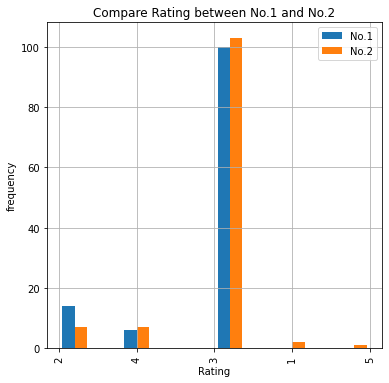

In [ ]:
mpl.rcParams['figure.figsize']=[6,6]

a6 = np.array(q['ให้คะแนนทรัพย์'])
b6 = np.array(r['ให้คะแนนทรัพย์'])

plt.hist([a6,b6],label=['No.1','No.2'])
plt.legend(loc='upper right')
plt.title("Compare Rating between No.1 and No.2")
plt.xlabel("Rating")
plt.ylabel("frequency")
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

## อาคารพาณิชย์

In [127]:
building_new.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,6000000,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,8000000,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000,13500000,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [128]:
building_new.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

In [129]:
building_new = building_new.dropna(subset=['ให้คะแนนทรัพย์','ประเมินราคาซื้อ-ขาย'])
building_new.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

In [130]:
building_new1 = building_new.groupby(['ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์'])[['ความมั่นใจในการเมินราคาทรัพย์']].count()
building_new1

,,ความมั่นใจในการเมินราคาทรัพย์
ID ผู้ประเมิน,ความมั่นใจในการเมินราคาทรัพย์,
1,มั่นใจ,91
2,มั่นใจ,91


### เปรียบเทียบความมั่นใจจากนักประเมินคนที่ 1 และคนที่ 2 ของอาคารพาณิชย์

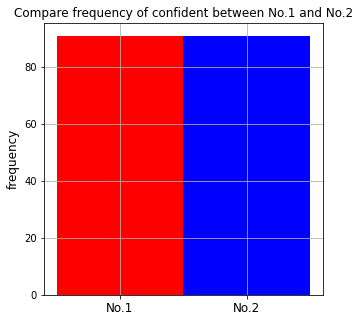

In [131]:
mpl.rcParams['figure.figsize']=[5,5]

plt.bar([1,1.5],building_new1['ความมั่นใจในการเมินราคาทรัพย์'], color=['red','blue'],width=0.5) 
plt.xticks([1,1.5],['No.1','No.2'],fontsize=12)
plt.title('Compare frequency of confident between No.1 and No.2',fontsize=12)
plt.grid(True)
plt.ylabel('frequency',fontsize=12);

### เปรียบเทียบคะแนนทรัพย์จากนักประเมินคนที่ 1 และคนที่ 2 ของอาคารพาณิชย์

In [132]:
s = building_1.replace(['1 ขายไม่ได้แน่นอน','2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี','3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน','4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน','5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน'], ['1','2','3','4','5'])
s = s.replace(['มั่นใจ'], ['confidence'])
s.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,confidence,6600000,6000000,3
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,confidence,11400000,12000000,4
4,1,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,confidence,22500000,13500000,2
6,1,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,confidence,3500000,4000000,4
8,1,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,confidence,3900000,2200000,2


In [133]:
t = building_2.replace(['1 ขายไม่ได้แน่นอน','2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี','3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน','4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน','5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน'], ['1','2','3','4','5'])
t = t.replace(['มั่นใจ'], ['confidence'])
t.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมิน2
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,confidence,6600000,8000000,4,6000000
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,confidence,11400000,12000000,2,12000000
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,confidence,22500000,20000000,3,13500000
7,2,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,confidence,3500000,4000000,4,4000000
9,2,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,confidence,3900000,3000000,2,2200000


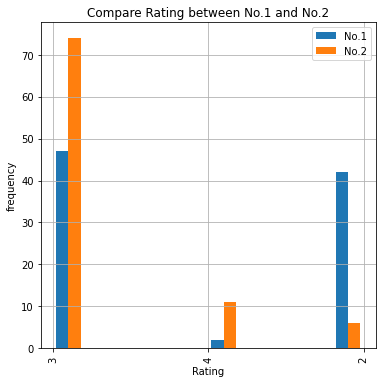

In [134]:
mpl.rcParams['figure.figsize']=[6,6]

x = np.array(s['ให้คะแนนทรัพย์'])
y = np.array(t['ให้คะแนนทรัพย์'])

plt.hist([x,y], label=['No.1','No.2'])
plt.legend(loc='upper right')
plt.title("Compare Rating between No.1 and No.2")
plt.xlabel("Rating")
plt.ylabel("frequency")
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

# กราฟแสดงความสัมพันธ์ของราคาตั้งขายและราคาประเมินซื้อ-ขาย

## บ้าน

In [135]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns

In [136]:
aa.rename(columns={'ราคาทรัพย์': 'property price'}, inplace=True)
aa.rename(columns={'ประเมิน1': '1st Assessor'}, inplace=True)
aa.rename(columns={'ประเมิน2': '2nd Assessor'}, inplace=True)
aa.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ID ผู้ประเมิน,post id,property price,2nd Assessor,1st Assessor
1,2,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0
3,2,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0
5,2,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0
7,2,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0
9,2,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0


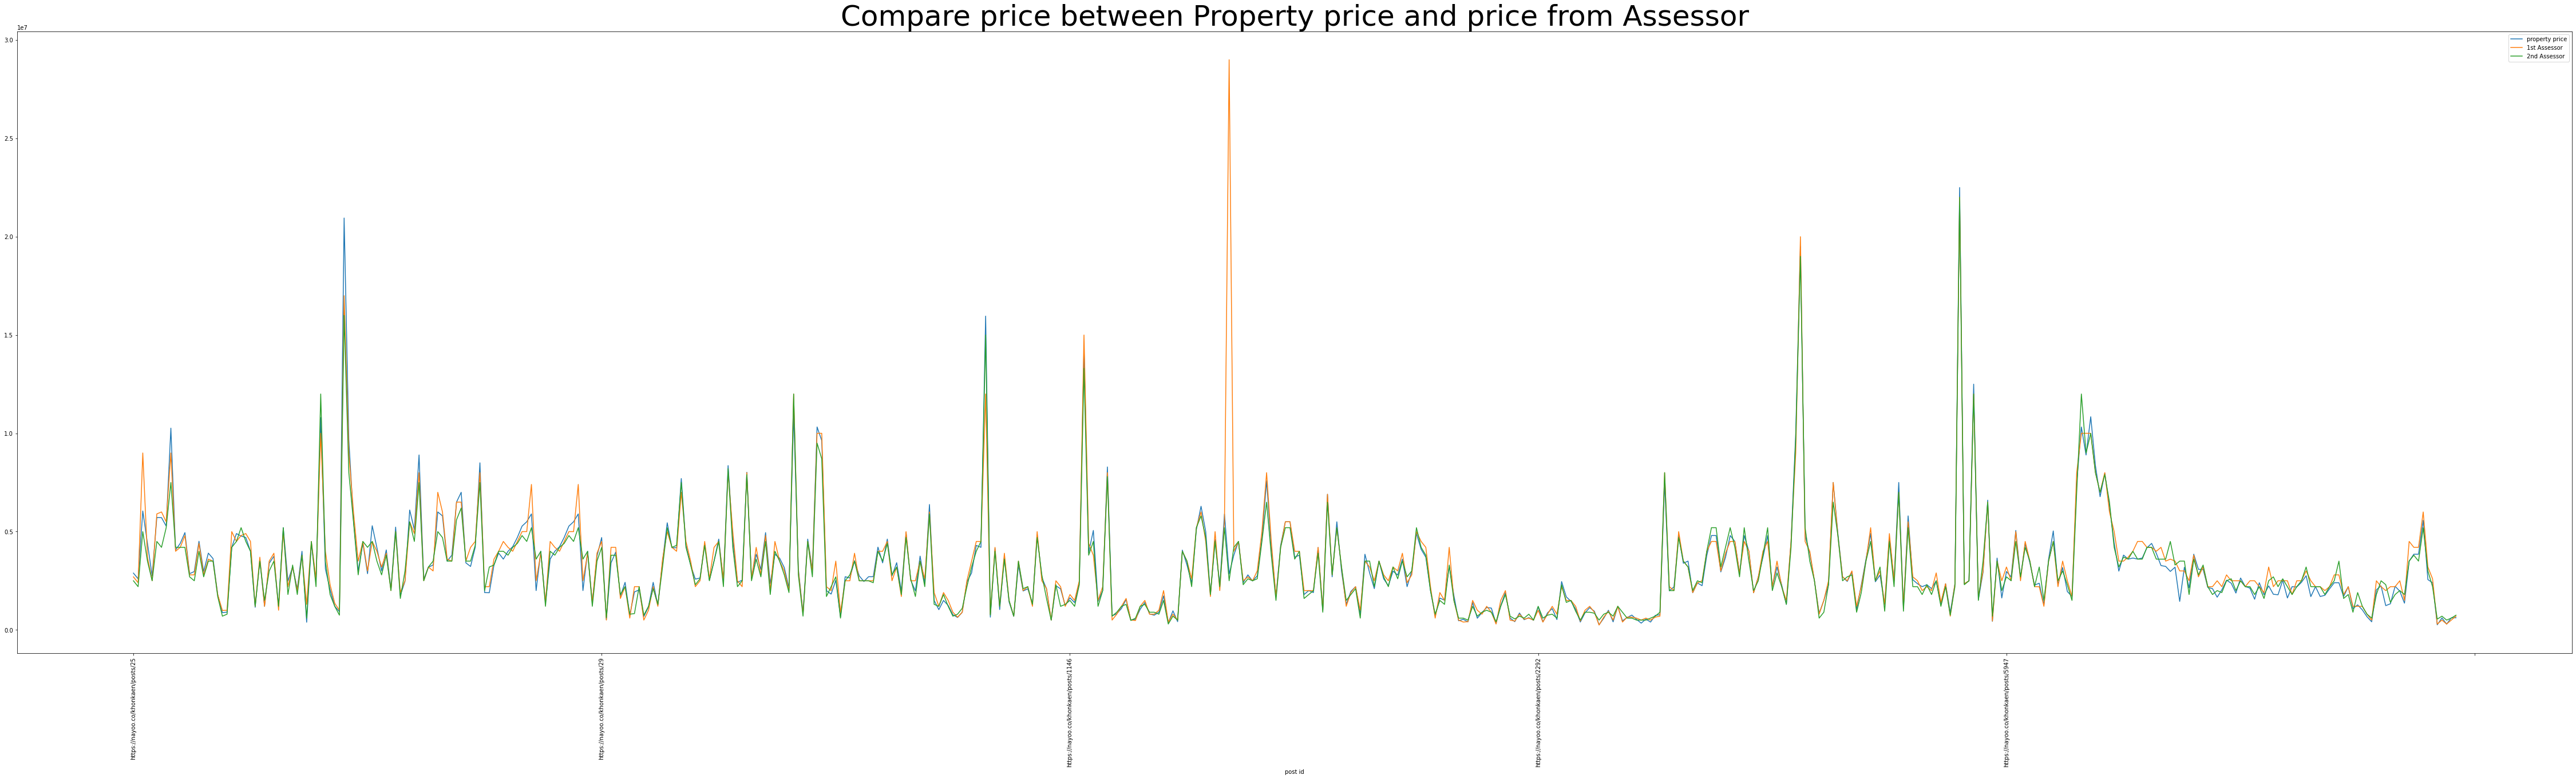

In [137]:
aa.plot('post id',['property price','1st Assessor', '2nd Assessor'],figsize=(80,20))
plt.title("Compare price between Property price and price from Assessor",fontsize=50)
plt.xlabel("post id")
plt.xticks(rotation='vertical')
plt.show() ;

## ที่ดิน

In [138]:
land_b.rename(columns={'ราคาทรัพย์': 'property price'}, inplace=True)
land_b.rename(columns={'ประเมิน1': '1st Assessor'}, inplace=True)
land_b.rename(columns={'ประเมิน2': '2nd Assessor'}, inplace=True)
land_b.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ID ผู้ประเมิน,post id,property price,2nd Assessor,1st Assessor
1,2,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,2,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,2,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,2,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,2,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0


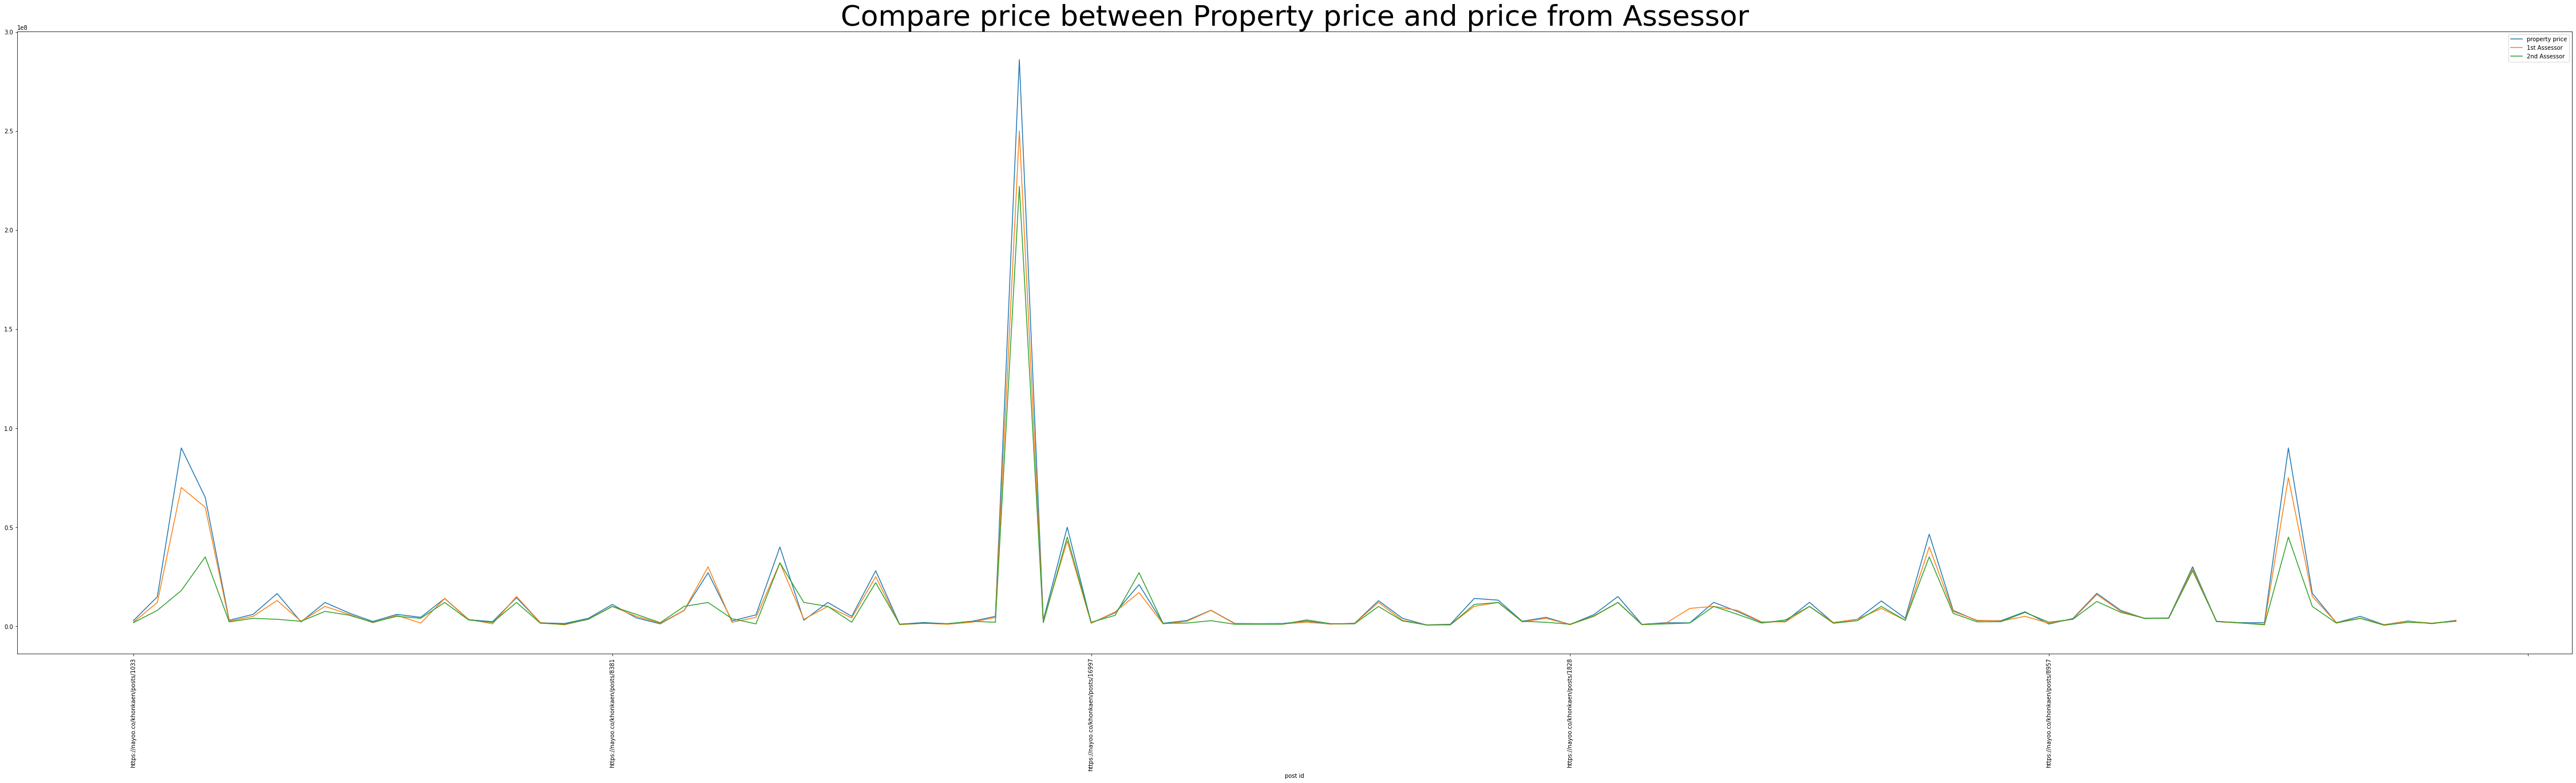

In [139]:
land_b.plot('post id',['property price','1st Assessor', '2nd Assessor'],figsize=(80,20))
plt.title("Compare price between Property price and price from Assessor",fontsize=50)
plt.xlabel("post id")
plt.xticks(rotation='vertical')
plt.show() ;

## ทาวน์โฮม

In [140]:
th_d.rename(columns={'ราคาทรัพย์': 'property price'}, inplace=True)
th_d.rename(columns={'ประเมิน1': '1st Assessor'}, inplace=True)
th_d.rename(columns={'ประเมิน2': '2nd Assessor'}, inplace=True)
th_d.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ID ผู้ประเมิน,post id,property price,2nd Assessor,1st Assessor
1,2,https://nayoo.co/khonkaen/posts/548,1045000,700000,1500000
3,2,https://nayoo.co/khonkaen/posts/549,935000,700000,1500000
5,2,https://nayoo.co/khonkaen/posts/579,2520000,3500000,4000000
7,2,https://nayoo.co/khonkaen/posts/580,3850000,3500000,3200000
9,2,https://nayoo.co/khonkaen/posts/582,544000,1000000,800000


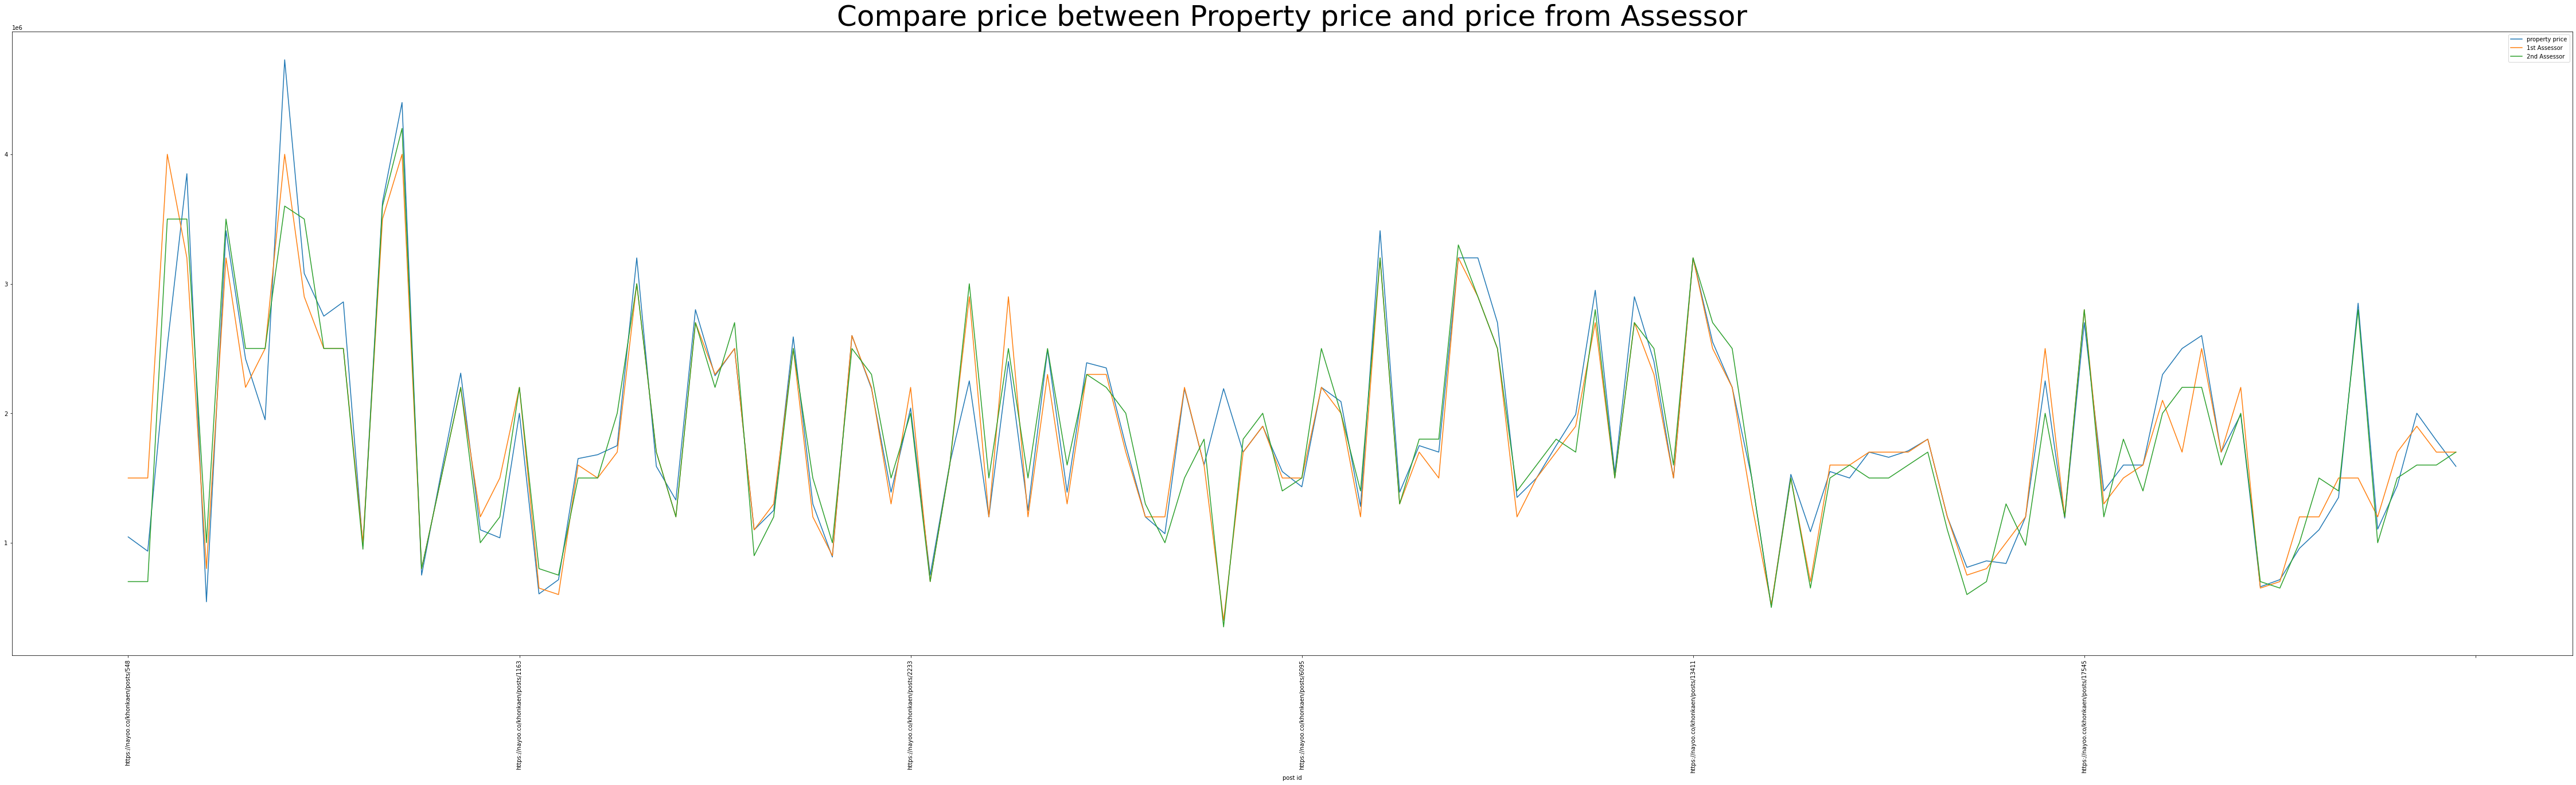

In [141]:
th_d.plot('post id',['property price','1st Assessor', '2nd Assessor'],figsize=(80,20))
plt.title("Compare price between Property price and price from Assessor",fontsize=50)
plt.xlabel("post id")
plt.xticks(rotation='vertical')
plt.show() ;

## อาคารพาณิชย์

In [142]:
b_d.rename(columns={'ราคาทรัพย์': 'property price'}, inplace=True)
b_d.rename(columns={'ประเมิน1': '1st Assessor'}, inplace=True)
b_d.rename(columns={'ประเมิน2': '2nd Assessor'}, inplace=True)
b_d.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ID ผู้ประเมิน,post id,property price,2nd Assessor,1st Assessor
1,2,https://nayoo.co/khonkaen/posts/6,6600000,6000000,8000000
3,2,https://nayoo.co/khonkaen/posts/17,11400000,12000000,12000000
5,2,https://nayoo.co/khonkaen/posts/21,22500000,13500000,20000000
7,2,https://nayoo.co/khonkaen/posts/22,3500000,4000000,4000000
9,2,https://nayoo.co/khonkaen/posts/24,3900000,2200000,3000000


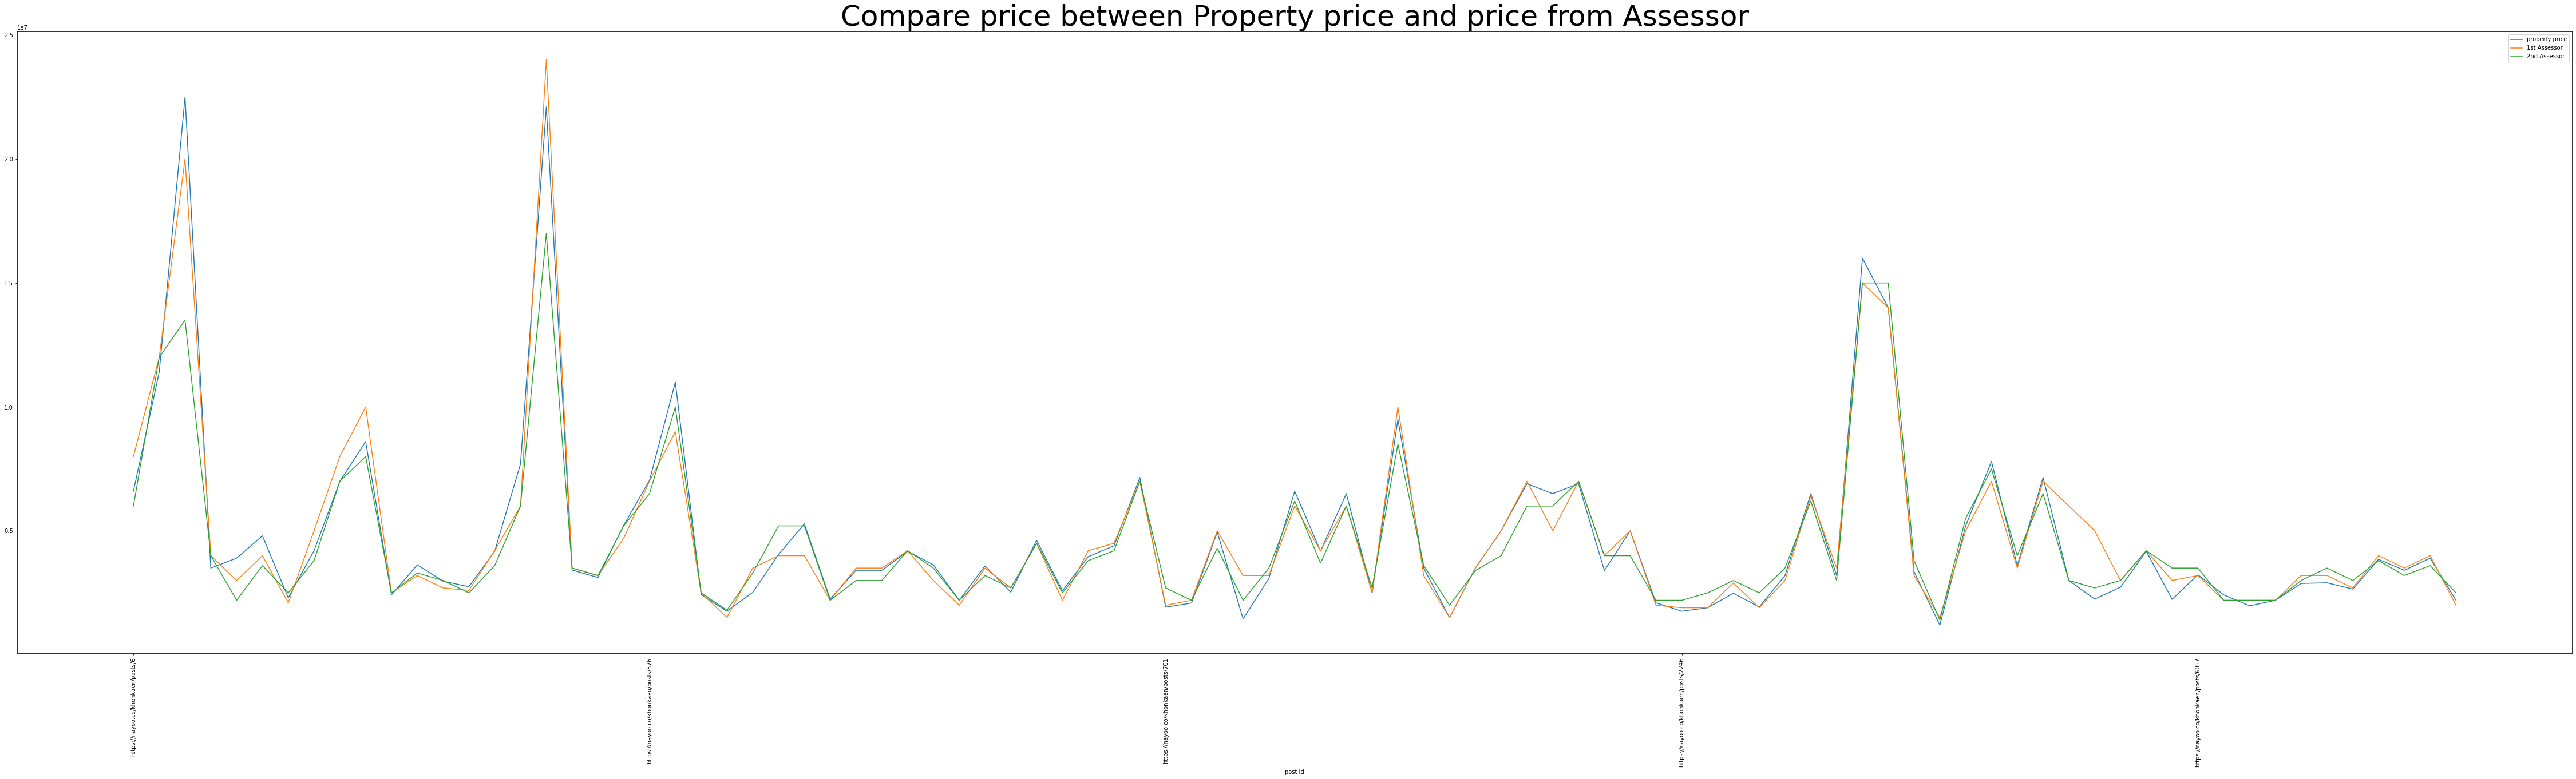

In [143]:
b_d.plot('post id',['property price','1st Assessor', '2nd Assessor'],figsize=(80,20))
plt.title("Compare price between Property price and price from Assessor",fontsize=50)
plt.xlabel("post id")
plt.xticks(rotation='vertical')
plt.show() ;